In [1]:
import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file = 'william_wilberforce.txt'
william_wilberforce = open(file,'r',encoding="utf8").read()

In [3]:
file = 'lincoln.txt'
lincoln = open(file,'r',encoding="utf8").read()

In [4]:
file = 'subhas_chandra_bose.txt'
subhas = open(file,'r',encoding="utf8").read()

In [5]:
file = 'patrick_henry.txt'
henry = open(file,'r',encoding="utf8").read()

In [6]:
file = 'nelson_mandela.txt'
nelson_mandela = open(file,'r',encoding="utf8").read()

In [7]:
file = 'martin_luther_king.txt'
luther = open(file,'r',encoding="utf8").read()

In [8]:
file = 'gandhi.txt'
gandhi = open(file,'r',encoding="utf8").read()

In [9]:
file = 'demosthenes.txt'
demosthenes = open(file,'r',encoding="utf8").read()

In [10]:
file = 'churchill.txt'
churchill = open(file,'r',encoding="utf8").read()

In [11]:
file = 'emmeline_pankhurst.txt'
pankhurst = open(file,'r',encoding="utf8").read()

In [12]:
def preparation(text):
    
    for c in ['.',',',':',';','-','&', '/', 'my']:
        text = text.replace(c,'')
    
    tokens = text.split()
    tokens=[token.lower() for token in tokens if token.isalpha()]
    ctokens = tokens
    sw = stopwords.words('english')
    
    for token in tokens:
        if token in sw:
            ctokens.remove(token)
            
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(ctokens)):
        ctokens[i] = lemmatizer.lemmatize(ctokens[i])
    return ctokens

In [13]:
tokens_william_wilberforce = preparation(william_wilberforce)

In [14]:
len(tokens_william_wilberforce)

986

In [15]:
tokens_lincoln = preparation(lincoln)

tokens_subhas = preparation(subhas)

tokens_henry = preparation(henry)

tokens_nelson_mandela = preparation(nelson_mandela)

tokens_luther = preparation(luther)

tokens_gandhi = preparation(gandhi)

tokens_demosthenes = preparation(demosthenes)

tokens_churchill = preparation(churchill)

tokens_pankhurst = preparation(pankhurst)

# Addition of Positive and Negative tokens

In [16]:
#opened file with the list of positive words for futher analysis
file_positive = 'p.txt'
pos = open(file_positive,'r').read().split()

In [17]:
#opened file with the list of negative words for futher analysis
file_negative = 'n.txt'
neg = open(file_negative,'r').read().split()

In [18]:
len(tokens_lincoln) 

174

In [19]:
len(tokens_subhas) 

1000

In [20]:
len(tokens_henry) 

720

In [21]:
len(tokens_nelson_mandela)

3740

In [22]:
len(tokens_luther)

1050

In [23]:
len(tokens_gandhi)

667

In [24]:
len(tokens_demosthenes)

3980

In [25]:
len(tokens_churchill)

2415

In [26]:
len(tokens_pankhurst)

9021

# Calculation of overall positiveness, negativity and neutrality of texts

In [27]:
def affection (ctoken):
    countpositive = countnegative = countneutral = counttotal = 0
    for token in ctoken:
        counttotal = counttotal + 1
        if token in pos:
            countpositive = countpositive + 1
        elif token in neg:
            countnegative = countnegative + 1
        else:
            countneutral = countneutral + 1
    print("Positive=%.3f Negative=%.3f Neutral=%.3f" % (countpositive/counttotal, countnegative/counttotal, countneutral/counttotal))

    print("Positiveness=%.3f Affection=%.3f" % (math.log(countpositive/countnegative), 1-countneutral/counttotal))

In [28]:
affection(tokens_lincoln)

Positive=0.086 Negative=0.057 Neutral=0.856
Positiveness=0.405 Affection=0.144


In [29]:
affection(tokens_william_wilberforce)

Positive=0.034 Negative=0.065 Neutral=0.901
Positiveness=-0.633 Affection=0.099


In [30]:
affection(tokens_subhas)

Positive=0.075 Negative=0.035 Neutral=0.890
Positiveness=0.762 Affection=0.110


In [31]:
affection(tokens_henry)

Positive=0.071 Negative=0.062 Neutral=0.867
Positiveness=0.125 Affection=0.133


In [32]:
affection(tokens_nelson_mandela)

Positive=0.030 Negative=0.053 Neutral=0.916
Positiveness=-0.562 Affection=0.084


In [33]:
affection(tokens_luther)

Positive=0.093 Negative=0.064 Neutral=0.843
Positiveness=0.380 Affection=0.157


In [34]:
affection(tokens_gandhi)

Positive=0.057 Negative=0.057 Neutral=0.886
Positiveness=0.000 Affection=0.114


In [35]:
affection(tokens_demosthenes)

Positive=0.044 Negative=0.061 Neutral=0.895
Positiveness=-0.314 Affection=0.105


In [36]:
affection(tokens_churchill)

Positive=0.049 Negative=0.052 Neutral=0.899
Positiveness=-0.066 Affection=0.101


In [37]:
affection(tokens_pankhurst)

Positive=0.049 Negative=0.050 Neutral=0.901
Positiveness=-0.027 Affection=0.099


In [38]:
def scores(ctokens,number_of_words_in_one_group):
    score = []
    countpositive1 = countnegative1 = countneutral1 = counttotal1 = counttotal2 = 0
    count = 0
    for token in ctokens:
        counttotal1 = counttotal1 + 1
        if(counttotal1 % number_of_words_in_one_group == 0):
            if token in pos:
                countpositive1 = countpositive1 + 1
                count = countpositive1 - countnegative1
                score.append(count)
                count = 0
                countpositive1 = 0
                countnegative1 = 0
            elif token in neg:
                countnegative1 = countnegative1 + 1
                count = countpositive1 - countnegative1
                score.append(count)
                count = 0
                countpositive1 = 0
                countnegative1 = 0
            else:
                countneutral1 = countneutral1 + 1
                count = countpositive1 - countnegative1
                score.append(count)
                count = 0
                countpositive1 = 0
                countnegative1 = 0

        else:
            if token in pos:
                countpositive1 = countpositive1 + 1
            elif token in neg:
                countnegative1 = countnegative1 + 1
            else:
                countneutral1 = countneutral1 + 1
    return score

In [39]:
scores_lincoln = scores(tokens_lincoln,6)

In [40]:
scores_lincoln

[0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 -2,
 -2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 -2,
 -1,
 1,
 0,
 -1]

In [41]:
scores_william_wilberforce = scores(tokens_william_wilberforce,45)

In [42]:
scores_subhas = scores(tokens_subhas,40)

In [43]:
scores_henry = scores(tokens_henry,30)

In [44]:
scores_nelson_mandela = scores(tokens_nelson_mandela,170)

In [45]:
scores_luther = scores(tokens_luther,42)

In [46]:
scores_gandhi = scores(tokens_gandhi,29)

In [47]:
scores_demosthenes = scores(tokens_demosthenes,199)

In [48]:
scores_churchill = scores(tokens_churchill,105)

In [49]:
scores_pankhurst = scores(tokens_pankhurst,291)

In [50]:
# Counting the delta values in the radious of 5
def delta3(scores):
    delta3 = []

    for i in scores:
        cv = 0
        cv = scores[i] + scores[i-1] + scores[i+1] + scores[i-2] + scores[i+2]
        cv = cv/5
        delta3.append(cv)
    return delta3

In [51]:
delta3_lincoln = delta3(scores_lincoln)
delta3_lincoln

[0.2,
 0.2,
 0.8,
 0.4,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.4,
 -0.2,
 -0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.8,
 0.8,
 0.2,
 0.2,
 0.2,
 0.2,
 -0.2,
 0.0,
 0.4,
 0.2,
 0.0]

In [52]:
delta3_subhas = delta3(scores_subhas)

delta3_henry = delta3(scores_henry)

delta3_nelson_mandela = delta3(scores_nelson_mandela)

delta3_luther = delta3(scores_luther)

delta3_gandhi = delta3(scores_gandhi)

delta3_demosthenes = delta3(scores_demosthenes)

delta3_churchill = delta3(scores_churchill)

delta3_pankhurst = delta3(scores_pankhurst)

delta3_william_wilberforce = delta3(scores_william_wilberforce)

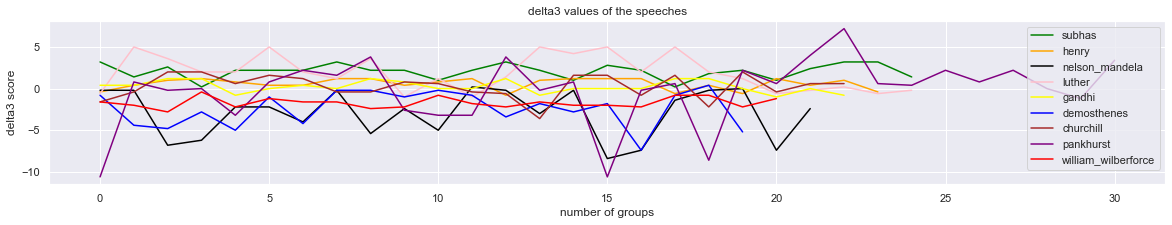

In [53]:
plt.rcParams["figure.figsize"] = (20,3) #set the picture size(inches)

plt.plot(delta3_subhas, label='subhas', color = 'green')

plt.plot(delta3_henry, label='henry', color = 'orange')

plt.plot(delta3_nelson_mandela, label='nelson_mandela', color = 'black')

plt.plot(delta3_luther, label='luther', color = 'pink')

plt.plot(delta3_gandhi, label='gandhi', color = 'yellow')

plt.plot(delta3_demosthenes, label='demosthenes', color = 'blue')

plt.plot(delta3_churchill, label='churchill', color = 'brown')

plt.plot(delta3_pankhurst, label='pankhurst', color = 'purple')

plt.plot(delta3_william_wilberforce, label='william_wilberforce', color = 'red')
plt.legend()
plt.xlabel('number of groups')
plt.ylabel('delta3 score')
plt.title('delta3 values of the speeches')
plt.show()

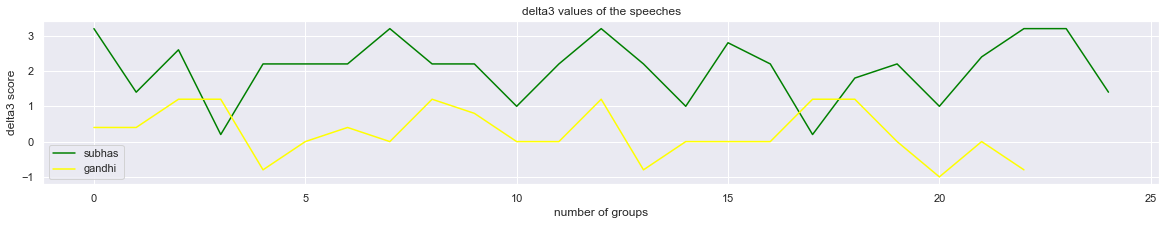

In [54]:
plt.plot(delta3_subhas, label='subhas', color = 'green')
plt.plot(delta3_gandhi, label='gandhi', color = 'yellow')
plt.legend()
plt.xlabel('number of groups')
plt.ylabel('delta3 score')
plt.title('delta3 values of the speeches')
plt.show()

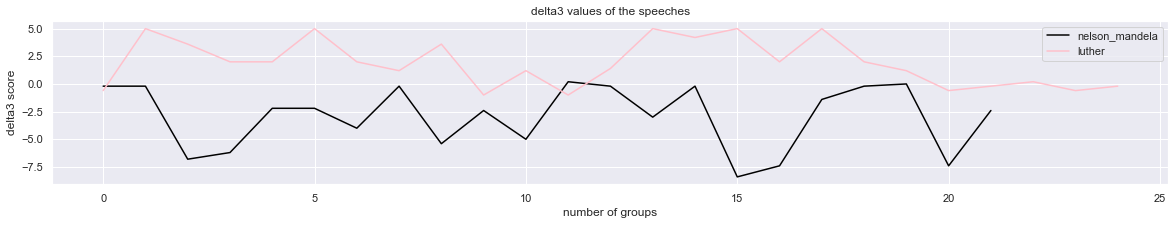

In [55]:
plt.plot(delta3_nelson_mandela, label='nelson_mandela', color = 'black')

plt.plot(delta3_luther, label='luther', color = 'pink')

plt.legend()
plt.xlabel('number of groups')
plt.ylabel('delta3 score')
plt.title('delta3 values of the speeches')
plt.show()